# Data Site = https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

# 0. 필요한 패키지 불러오기

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

#그래프에 한글 안깨지게 하는 함수 포함
import matplotlib
from matplotlib import font_manager, rc
import platform
matplotlib.rc('font', family = 'NanumBarunGothic')

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font',family = font_name)
else:
    rc('font',family = 'AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False #그래프 마이너스 표시

import pandas as pd
import seaborn as sns

# 1.이산형 반응변수인 y변수를 목적에 맞게 변형(이산형->범주형)

In [2]:
wine = pd.read_csv('redwine.csv')

wine['quality'] = wine['quality'].replace(3, 'low rank')
wine['quality'] = wine['quality'].replace(4, 'low rank')
wine['quality'] = wine['quality'].replace(5, 'low rank')
wine['quality'] = wine['quality'].replace(6, 'high rank')
wine['quality'] = wine['quality'].replace(7, 'high rank')
wine['quality'] = wine['quality'].replace(8, 'high rank')

In [4]:
wine.rename(columns = {'fixed acidity' : 'fixacid', 'volatile acidity' : 'volacid', 'citric acid' : 'citacid', 
         'residual sugar' : 'rsugar', 'chlorides' : 'salt', 
                    'free sulfur dioxide' : 'freedioxid', 'total sulfur dioxide' : 'totaldioxid'  },   inplace = True)

# 2. 전체적인 사항 파악하기

In [5]:
wine.head()

,fixacid,volacid,citacid,rsugar,salt,freedioxid,totaldioxid,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low rank
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,low rank
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,low rank
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,high rank
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low rank


In [18]:
wine.describe()

,fixacid,volacid,citacid,rsugar,salt,freedioxid,totaldioxid,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


변수설명(한글)

- 고정 산도    포도주에 고정되어 있는 산미 정도

- 휘발성 산도  높은 수준에서는 불쾌한 식초 맛을 초래할 수있는 와인의 아세트산의 양

- 구연산      소량으로 발견되는 경우 와인에 신선함과 맛을 추가하는 구연산 양.

- 잔류 설탕    와인 발효 후 잔류하는 설탕의 양, ex) 1g / L 미만의 와인은 드물며. 45g / L 이상의 와인은 단맛으로 여겨짐.

- 염화물      와인에 들어있는 소금의 양

- 자유 황산    미생물 성장과 포도주의 산화를 방지하는 황산 값.

- 총 이산화황   자유황산등으로 인해 때문에 생기는 이산화황, 저농도에서 SO2는 와인에서는 거의 검출되지 않지만, 50ppm 이상에서는 이산화황의 향과 맛이 느껴짐.


- 밀도         알코올과 설탕 퍼센트 함량으로 결정됨.

- pH          와인의 산성,염기성 정도. 대부분의 와인은 pH 가늠자에 3-4 사이에서있다

- 황산염       와인 첨가제로서 항균 및 항산화 작용 수행

- 알코올       와인의 알콜 함량 퍼센트

- 품질출력 변수 (감각 데이터를 기반으로 0과 10 사이의 점수)  -> 실제로는 red는 3~8 정수값만 가지고있음 -> 퍼센트대로 등급을 나누어서 분류 수행

# 3.각 변수의 분포 확인 및 변수 시각화 작업

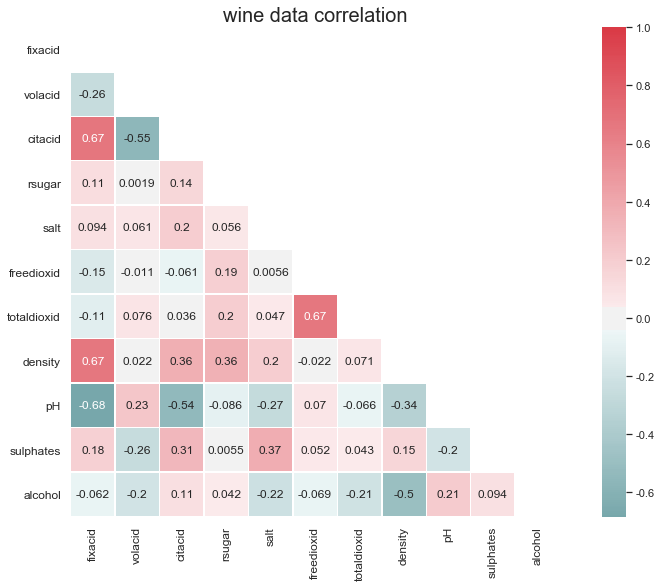

In [8]:
sns.set(style = "white")

wine_x_columns = wine.columns[:-1]
cor = wine.corr()

mask = np.zeros_like(cor, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize = (15,9))
cmap = sns.diverging_palette(200, 10, as_cmap = True)
sns.heatmap(cor, mask = mask,cmap = cmap,center = 0,square = True, 
            linewidths = 0.5, cbar_kws = {"shrink" : 1},annot = True)
plt.title('wine data correlation', size = 20)
ax.set_xticklabels(wine_x_columns, size = 12)
ax.set_yticklabels(wine_x_columns, size = 12);

# 4. 그래프 분포 파악(생략)

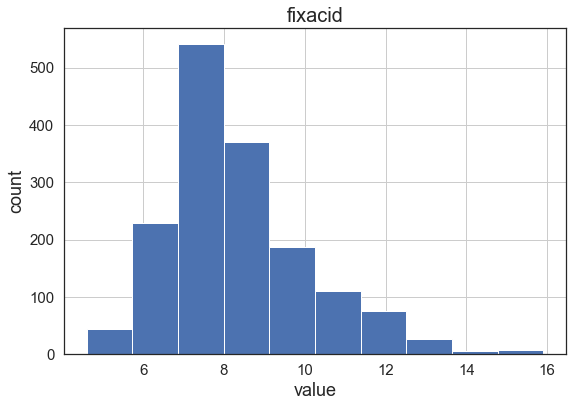

In [9]:
wine['fixacid'].hist(figsize = (9,6))
plt.title('fixacid',size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('value',size = 18)
plt.ylabel('count',size = 18);

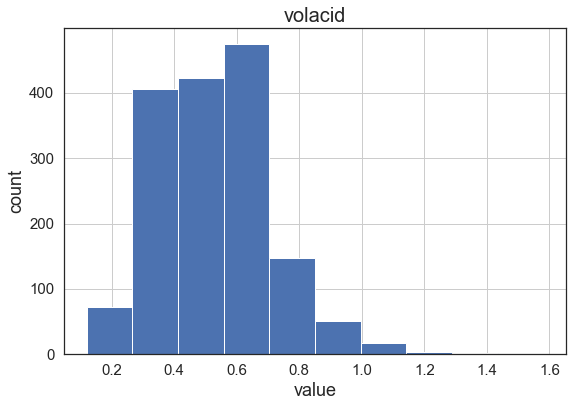

In [10]:
wine['volacid'].hist(figsize=(9,6))
plt.title('volacid',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('value',size=18)
plt.ylabel('count',size=18);

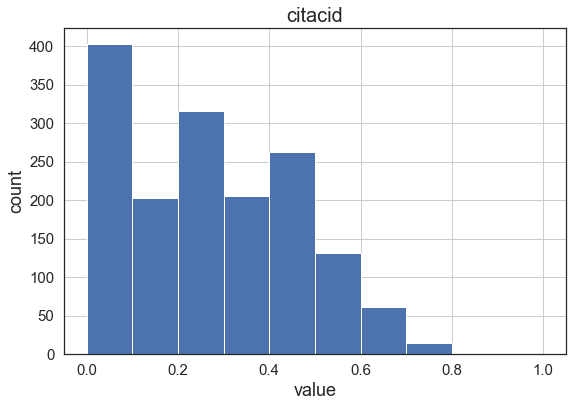

In [11]:
wine['citacid'].hist(figsize=(9,6))
plt.title('citacid',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('value',size=18)
plt.ylabel('count',size=18);

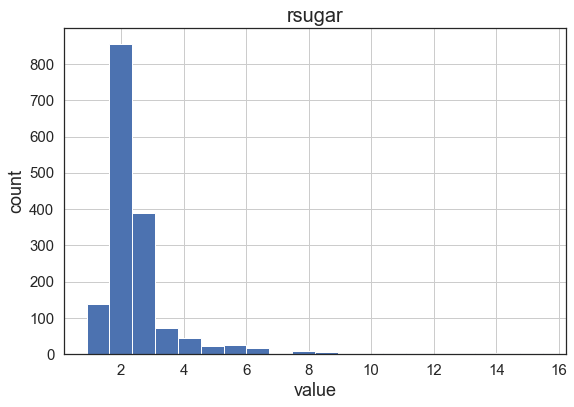

In [12]:
wine['rsugar'].hist(bins=20,figsize=(9,6))
plt.title('rsugar',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('value',size=18)
plt.ylabel('count',size=18);

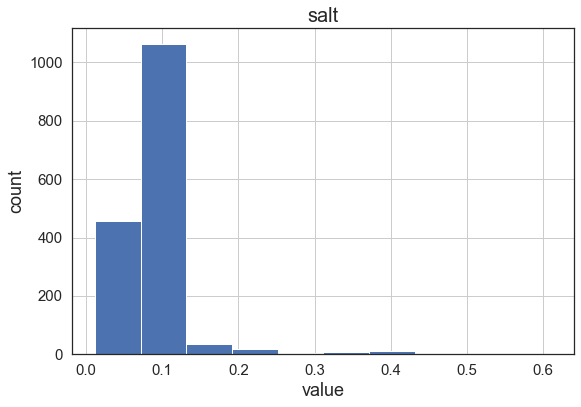

In [13]:
wine['salt'].hist(figsize=(9,6))
plt.title('salt',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('value',size=18)
plt.ylabel('count',size=18);

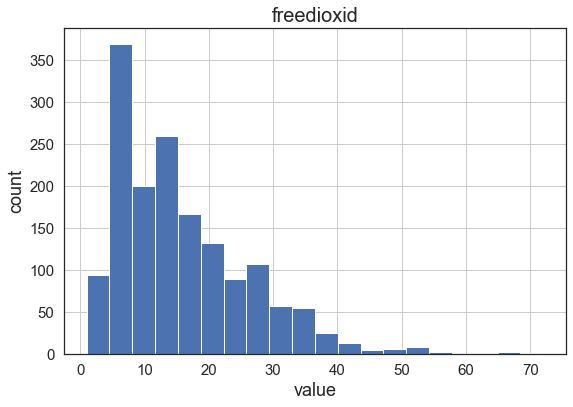

In [14]:
wine['freedioxid'].hist(bins=20,figsize=(9,6))
plt.title('freedioxid',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('value',size=18)
plt.ylabel('count',size=18);

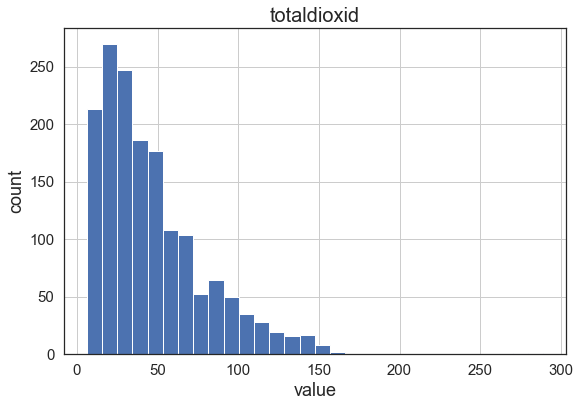

In [15]:
wine['totaldioxid'].hist(bins=30,figsize=(9,6))
plt.title('totaldioxid',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('value',size=18)
plt.ylabel('count',size=18);

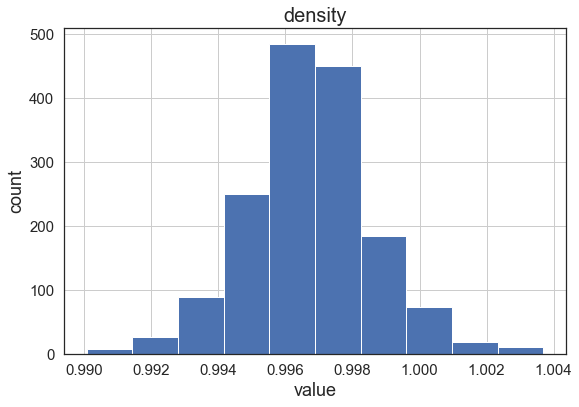

In [16]:
wine['density'].hist(figsize=(9,6))
plt.title('density',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('value',size=18)
plt.ylabel('count',size=18);

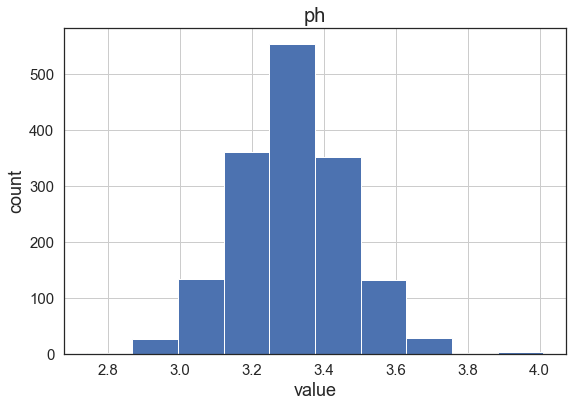

In [17]:
wine['pH'].hist(figsize=(9,6))
plt.title('ph',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('value',size=18)
plt.ylabel('count',size=18);

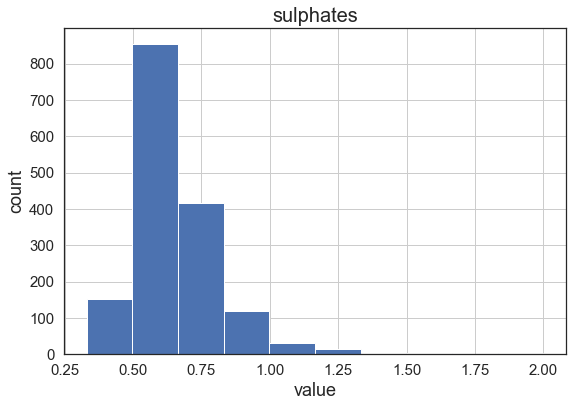

In [18]:
wine['sulphates'].hist(figsize=(9,6))
plt.title('sulphates',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('value',size=18)
plt.ylabel('count',size=18);

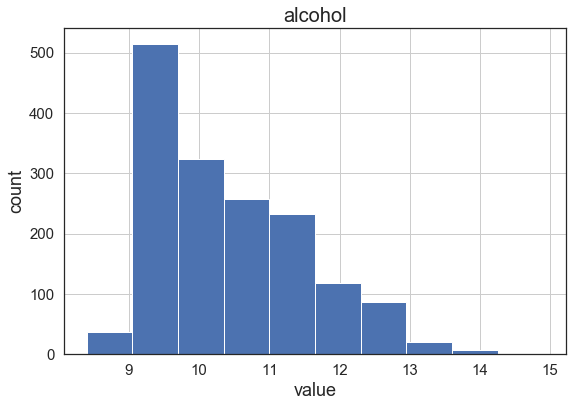

In [19]:
wine['alcohol'].hist(figsize=(9,6))
plt.title('alcohol',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('value',size=18)
plt.ylabel('count',size=18);

In [22]:
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font',family = font_name)
else:
    rc('font',family = 'AppleGothic')

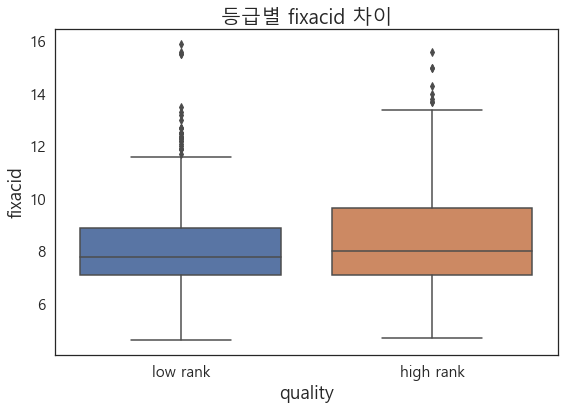

In [23]:
f,ax=plt.subplots(figsize=(9,6))
sns.boxplot(x="quality",  y="fixacid", data=wine)
plt.title('등급별 fixacid 차이',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('quality',size=18)
plt.ylabel('fixacid',size=18);

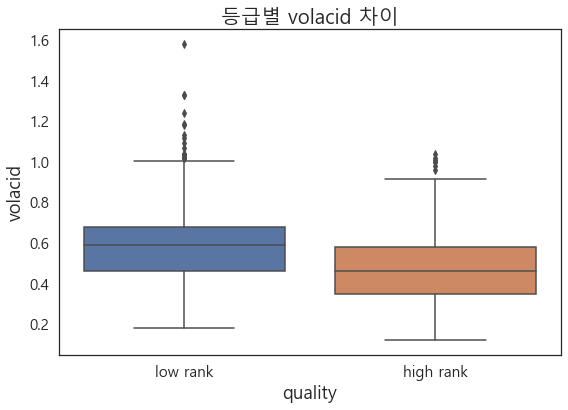

In [24]:
f,ax=plt.subplots(figsize=(9,6))
sns.boxplot(x="quality",  y="volacid", data=wine)
plt.title('등급별 volacid 차이',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('quality',size=18)
plt.ylabel('volacid',size=18);

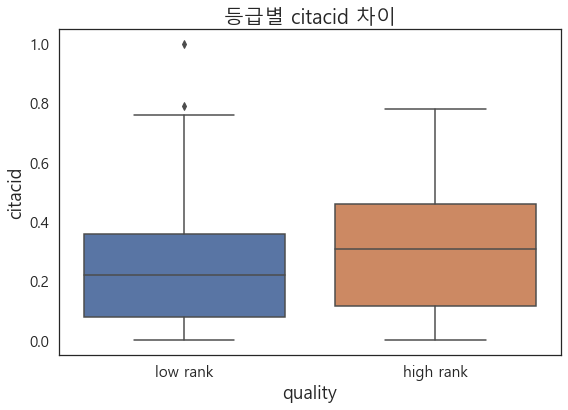

In [25]:
f,ax=plt.subplots(figsize=(9,6))
sns.boxplot(x="quality",  y="citacid", data=wine)
plt.title('등급별 citacid 차이',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('quality',size=18)
plt.ylabel('citacid',size=18);

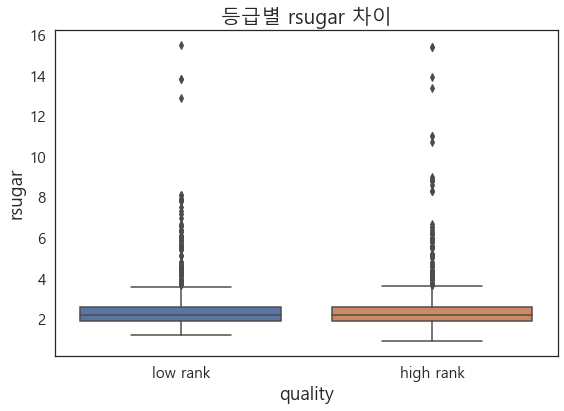

In [26]:
f,ax=plt.subplots(figsize=(9,6))
sns.boxplot(x="quality",  y="rsugar", data=wine)
plt.title('등급별 rsugar 차이',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('quality',size=18)
plt.ylabel('rsugar',size=18);

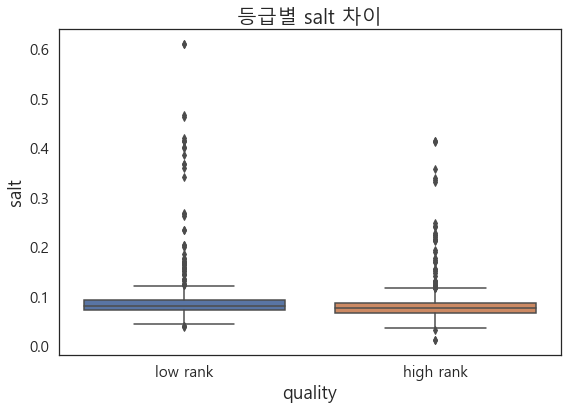

In [27]:
f,ax=plt.subplots(figsize=(9,6))
sns.boxplot(x="quality",  y="salt", data=wine)
plt.title('등급별 salt 차이',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('quality',size=18)
plt.ylabel('salt',size=18);

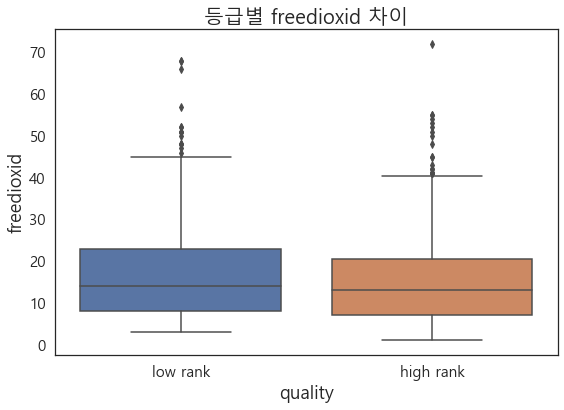

In [28]:
f,ax=plt.subplots(figsize=(9,6))
sns.boxplot(x="quality",  y="freedioxid", data=wine)
plt.title('등급별 freedioxid 차이',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('quality',size=18)
plt.ylabel('freedioxid',size=18);

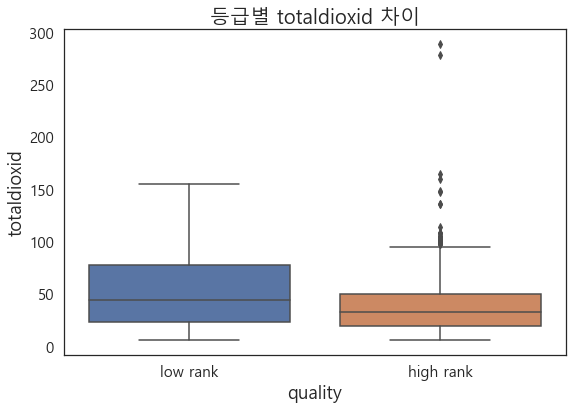

In [29]:
f,ax=plt.subplots(figsize=(9,6))
sns.boxplot(x="quality",  y="totaldioxid", data=wine)
plt.title('등급별 totaldioxid 차이',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('quality',size=18)
plt.ylabel('totaldioxid',size=18);

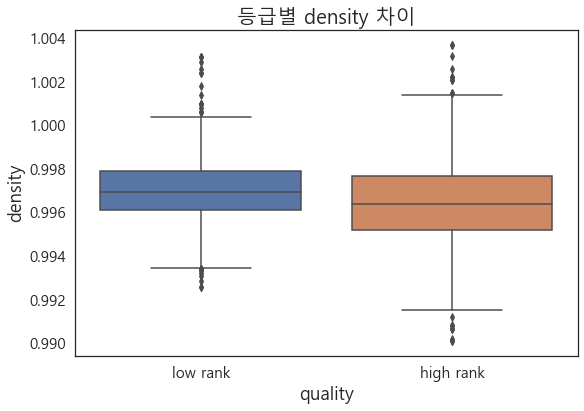

In [30]:
f,ax=plt.subplots(figsize=(9,6))
sns.boxplot(x="quality",  y="density", data=wine)
plt.title('등급별 density 차이',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('quality',size=18)
plt.ylabel('density',size=18);

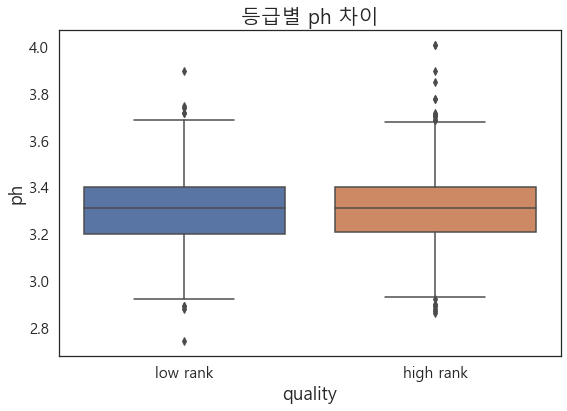

In [31]:
f,ax=plt.subplots(figsize=(9,6))
sns.boxplot(x="quality",  y="pH", data=wine)
plt.title('등급별 ph 차이',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('quality',size=18)
plt.ylabel('ph',size=18);

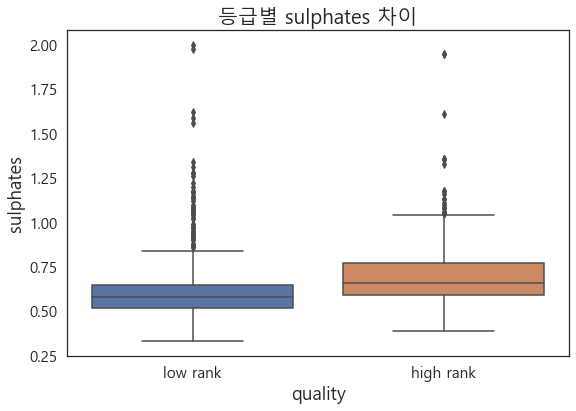

In [32]:
f,ax=plt.subplots(figsize=(9,6))
sns.boxplot(x="quality",  y="sulphates", data=wine)
plt.title('등급별 sulphates 차이',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('quality',size=18)
plt.ylabel('sulphates',size=18);

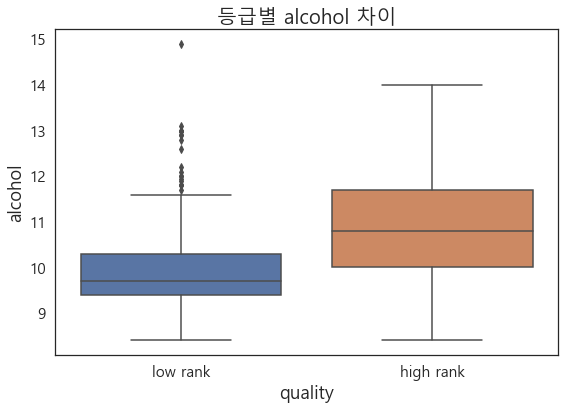

In [33]:
f,ax=plt.subplots(figsize=(9,6))
sns.boxplot(x="quality",  y="alcohol", data=wine)
plt.title('등급별 alcohol 차이',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('quality',size=18)
plt.ylabel('alcohol',size=18);

# 5. 시각화에서 발견된 이상치 제거작업(파이썬)

In [34]:
quantile_ninety_five=2*wine.quantile(0.95) 

quantile_ninety_five # 0 ~ 10

fixacid         23.6000
volacid          1.6800
citacid          1.2000
rsugar          10.2000
salt             0.2522
freedioxid      70.0000
totaldioxid    224.2000
density          2.0000
pH               7.1400
sulphates        1.8600
alcohol         25.0000
Name: 0.95, dtype: float64

In [35]:
wine = wine[wine['fixacid'] <= quantile_ninety_five[0]]
wine = wine[wine['volacid'] <= quantile_ninety_five[1]]
wine = wine[wine['citacid'] <= quantile_ninety_five[2]]
wine = wine[wine['rsugar'] <= quantile_ninety_five[3]]
wine = wine[wine['salt'] <= quantile_ninety_five[4]]
wine = wine[wine['freedioxid'] <= quantile_ninety_five[5]]
wine = wine[wine['totaldioxid'] <= quantile_ninety_five[6]]
wine = wine[wine['density'] <= quantile_ninety_five[7]]
wine = wine[wine['pH'] <= quantile_ninety_five[8]]
wine = wine[wine['sulphates'] <= quantile_ninety_five[9]]
wine = wine[wine['alcohol'] <= quantile_ninety_five[10]]

wine.describe()

,fixacid,volacid,citacid,rsugar,salt,freedioxid,totaldioxid,density,pH,sulphates,alcohol
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,8.316367,0.528665,0.265777,2.465629,0.082319,15.721438,45.643774,0.996719,3.316560,0.647766,10.443742
std,1.752520,0.179674,0.191676,1.065970,0.024106,10.252484,31.557502,0.001862,0.150953,0.143165,1.063866
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995585,3.212500,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996710,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.089000,21.000000,61.000000,0.997820,3.400000,0.720000,11.100000
max,15.900000,1.580000,0.790000,9.000000,0.250000,68.000000,165.000000,1.003200,4.010000,1.620000,14.900000


In [36]:
wine.to_csv('wine2.csv', index=False)